# ROOSTER training framework (MSAP4-03)

This notebook provide an example of the analysis of a set of stars with catalog-existing reference $P_\mathrm{rot}$, and use the set to train an instance of ROOSTER.

First we need to import the demonstrator module and the auxiliary module containing the dataset we are going to work with.

**Note:** This notebook has been designed for the purpose of scientific justification of PLATO MSAP4-03. The notebook illustrated the precise flowchart envisaged for PLATO MSAP4-03 is cs_rooster_sph_analysis.ipynb

In [1]:
import star_privateer as sp
import plato_msap4_demonstrator_datasets.kepler_dataset as kepler_dataset

We also need to import some other modules to run the notebook and to check that the outputs directory that we need exist

In [2]:
import importlib
import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists ('rooster_training_features') :
    os.mkdir ('rooster_training_features')
if not os.path.exists ('rooster_training_plots') :
    os.mkdir ('rooster_training_plots')
if not os.path.exists ('rooster_instances') :
    os.mkdir ('rooster_instances')

## Running the analysis pipeline

We are going to work with a sample of 1991 *Kepler* stars analysed by Santos et al. (2019, 2021). The light curves have been calibrated with the KEPSEISMIC method (see García et al. 2011, 2014), and all of them have been filtered with a 55-day high-pass filter. We can get the identifiers of the stars in the dataset with the following instruction:

In [3]:
list_kic = sp.get_list_targets (kepler_dataset)

The next step is to run the analysis pipeline on every light curve in the dataset. The analysis pipeline in its default behaviour will compute the Lomb-Scargle periodogram (LSP) of the light curve as well as its auto-correlation function (ACF). ACF and LSP will then be used to compute a composite spectrum (CS), obtained by multiplying one by another.
The feature computed for each stars are stored in a dedicated csv file identified by the star identifier (in this case, the KIC of the star).

In [4]:
p_in = np.linspace (0, 100, 1000)
for kic in tqdm.tqdm (list_kic) :
    str_kic = str (kic).zfill (9)
    fileout = 'rooster_training_features/{}.csv'.format(str_kic)
    filename = sp.get_target_filename (kepler_dataset, str_kic)
    if not os.path.exists (fileout) :
        t, s, dt = sp.load_resource (filename)
        (p_ps, p_acf, ps, acf, 
         cs, features, feature_names, _) = sp.analysis_pipeline (t, s, periods_in=p_in,
                                                                    wavelet_analysis=False, plot=True,
                                                                    filename='rooster_training_plots/{}.png'.format(str_kic),
                                                                    figsize=(10,16),
                                                                    lw=1, dpi=300, smooth_acf=True)
        df = sp.save_features (fileout, kic, features, feature_names)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1991/1991 [00:00<00:00, 54489.96it/s]


After running the analysis pipeline, it is possible to concatenate the feature obtained for each star into one big DataFrame.

In [5]:
df = sp.build_catalog_features ('rooster_training_features')

This is typically what the DataFrame is going to look like:

In [6]:
df

prot_ps   prot_acf    prot_cs  e_prot_ps  E_prot_ps  e_prot_acf  \
target_id                                                                      
891901     73.598094   5.006284  52.030213   0.882710   0.904334        -1.0   
1162339    73.048392  39.232722  52.151878  11.328352  16.348211        -1.0   
1163248    73.048768  59.666638  91.054035  10.510133  14.697001        -1.0   
1164583    50.378386  43.850828  46.669255  12.525927  25.164926        -1.0   
1433067    73.048497  35.329934  47.031677  11.612365  16.946332        -1.0   
...              ...        ...        ...        ...        ...         ...   
12647815   10.435607  10.400735  10.457896   0.403142   0.436987        -1.0   
12737258   40.582931  77.586648  69.544307   4.159244   5.218136        -1.0   
12784167   18.262306  12.505398  91.216340   0.824439   0.905366        -1.0   
12834290   52.692311  56.049453  53.100597  10.789249  18.146115        -1.0   
12834663   89.966120  13.118167  91.094432   8.178801   9.996320        -1.0   

           E_prot_acf  e_prot_cs  E_prot_cs       sph_ps      sph_acf  \
target_id                                                               
891901           -1.0   5.782646   5.782646   782.552118   604.416480   
1162339          -1.0   1.333511   1.333511  2266.134459  2082.090930   
1163248          -1.0   4.333269   4.333269   541.300214   541.808769   
1164583          -1.0   5.785335   5.785335  1650.421415  1644.008810   
1433067          -1.0   1.742899   1.742899  1219.810610  1192.928427   
...               ...        ...        ...          ...          ...   
12647815         -1.0   0.152860   0.152860  4727.467867  4733.483163   
12737258         -1.0   3.577662   3.577662  2135.495994  2155.693110   
12784167         -1.0   3.206358   3.206358   632.040500   609.092436   
12834290         -1.0   1.528117   1.528117   528.632031   525.789101   
12834663         -1.0   8.891671   8.891671  1084.671035   996.803485   

                sph_cs      h_ps  fa_prob_ps      hacf      gacf       hcs  
target_id                                                                   
891901      773.134552  0.121354         0.0  0.633684  0.265200  0.095594  
1162339    2150.902737  0.285520         0.0 -0.568057  0.001484  0.069160  
1163248     551.965885  0.092878         0.0  0.169691  0.373241  0.883819  
1164583    1698.895451  0.124362         0.0  0.342296  0.678006  0.467618  
1433067    1197.588777  0.175185         0.0 -0.559881  0.000288  0.140650  
...                ...       ...         ...       ...       ...       ...  
12647815   4721.753966  0.262546         0.0  0.627364  1.026059  0.532050  
12737258   2164.787863  0.146861         0.0  0.431254 -1.000000  0.542491  
12784167    650.432771  0.072066         0.0  0.102950  0.000197  2.136317  
12834290    531.063571  0.079475         0.0  0.100199  0.262818  0.675579  
12834663   1084.671035  0.280246         0.0  0.147318  0.006072  1.505906  

[1991 rows x 17 columns]

## Training and testing ROOSTER

Now that we have analysed a large sample of stars, we are able to use it to train the random forest ROOSTER methodology (see Breton et al. 2021). First, let's (arbitrarily) divide our DataFrame into a training set and a test set.

In [7]:
df_train = df.loc[df.index[::2]]
df_test = df.loc[df.index[1::2]]

The DataFrames let us obtain all the input we require to train and test ROOSTER:

In [8]:
training_id, training_p_candidates, training_features, feature_names = sp.create_rooster_feature_inputs (df_train)
test_id, test_p_candidates, test_features, test_feature_names = sp.create_rooster_feature_inputs (df_test)

Now, let's instantiate a new ROOSTER object. The main attributes of ROOSTER are its two random forest classifiers, ``RotClass`` and ``PeriodSel``. The properties of these classifiers can be specified by the user by passing the optional arguments of ``sklearn.ensemble.RandomForestClassifier`` to the created ROOSTER instance. 

In [9]:
seed = 104359357
chicken = sp.ROOSTER (n_estimators=100, random_state=np.random.RandomState (seed=seed))
chicken.RotClass, chicken.PeriodSel

(RandomForestClassifier(random_state=RandomState(MT19937) at 0x133970840),
 RandomForestClassifier(random_state=RandomState(MT19937) at 0x133970840))

The training is performed as follows:

In [10]:
chicken.train (training_id, training_p_candidates,
               training_features, feature_names=feature_names,
               catalog='santos-19-21', verbose=True)

Training RotClass with 405 stars with detected rotation and 494 without detected rotation.
Training PeriodSel with 405 stars.


Once properly trained, ROOSTER performances can be assessed with our test set:

In [11]:
results = chicken.test (test_id, test_p_candidates, test_features, 
                        feature_names=test_feature_names, 
                        catalog='santos-19-21', verbose=True)

Testing RotClass with 393 stars with detected rotation and 501 without detected rotation.
Testing PeriodSel with 393 stars.


The score obtained during the test set can be accessed through the ``getScore`` function, as well as the number of elements used for the training and the test steps. 

In [12]:
chicken.getScore ()

(0.9295302013422819, 0.9033078880407125)

In [13]:
chicken.getNumberEltTrain ()

(899, 405)

In [14]:
chicken.getNumberEltTest ()

(894, 393)

The $P_\mathrm{rot}$ computed by ROOSTER for the test set are returned when calling the function and it can be interesting to plot the distribution to compare it to the reference catalog values. 

In [15]:
prot_rooster = results[3]
prot_ref = sp.get_prot_ref (results[2], catalog='santos-19-21')

Let's take a look at the corresponding histogram

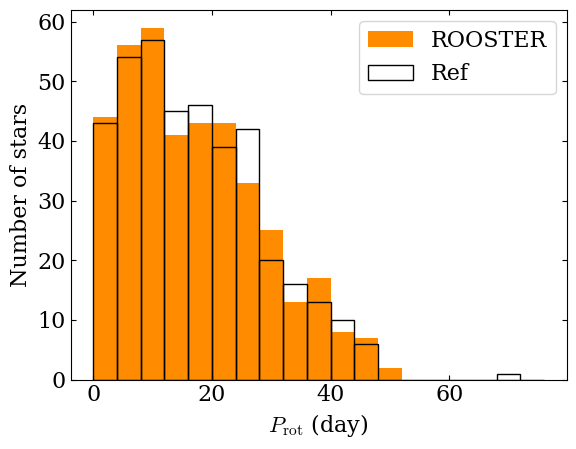

In [16]:
fig, ax = plt.subplots (1, 1)

bins = np.linspace (0, 80, 20, endpoint=False)

ax.hist (prot_rooster, bins=bins, color='darkorange', label='ROOSTER')
ax.hist (prot_ref, bins=bins, facecolor='none',
        edgecolor='black', label='Ref')

ax.set_xlabel (r'$P_\mathrm{rot}$ (day)')
ax.set_ylabel (r'Number of stars')

ax.legend ()

Finally, let's save our trained ROOSTER instance to be able to use it again later (for example in the next tutorial notebook !)

In [17]:
chicken.save ('rooster_instances/rooster_tutorial')